# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/1tghqqzx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmp1hzt7zdn


[d3graph] INFO> Writing /local/scratch/tmp/tmp1hzt7zdn/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
model.normalization = "sum"

In [4]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [5]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [6]:
model.normalization = "log"

  0%|          | 0/54 [00:00<?, ?it/s]

  2%|▏         | 1/54 [00:04<03:48,  4.30s/it]

  4%|▎         | 2/54 [00:05<02:13,  2.57s/it]

  6%|▌         | 3/54 [00:06<01:42,  2.00s/it]

  7%|▋         | 4/54 [00:08<01:27,  1.74s/it]

  9%|▉         | 5/54 [00:09<01:19,  1.62s/it]

 11%|█         | 6/54 [00:11<01:16,  1.59s/it]

 13%|█▎        | 7/54 [00:12<01:10,  1.51s/it]

 15%|█▍        | 8/54 [00:13<01:06,  1.46s/it]

 17%|█▋        | 9/54 [00:15<01:03,  1.42s/it]

 19%|█▊        | 10/54 [00:16<01:03,  1.43s/it]

 20%|██        | 11/54 [00:18<00:59,  1.38s/it]

 22%|██▏       | 12/54 [00:19<00:57,  1.36s/it]

 24%|██▍       | 13/54 [00:20<00:56,  1.38s/it]

 26%|██▌       | 14/54 [00:22<00:54,  1.36s/it]

 28%|██▊       | 15/54 [00:23<00:52,  1.35s/it]

 30%|██▉       | 16/54 [00:24<00:50,  1.33s/it]

 31%|███▏      | 17/54 [00:26<00:54,  1.46s/it]

 33%|███▎      | 18/54 [00:27<00:51,  1.42s/it]

 35%|███▌      | 19/54 [00:29<00:48,  1.39s/it]

 37%|███▋      | 20/54 [00:30<00:46,  1.37s/it]

 39%|███▉      | 21/54 [00:31<00:44,  1.34s/it]

 41%|████      | 22/54 [00:32<00:42,  1.32s/it]

 43%|████▎     | 23/54 [00:34<00:45,  1.47s/it]

 44%|████▍     | 24/54 [00:36<00:42,  1.43s/it]

 46%|████▋     | 25/54 [00:37<00:40,  1.40s/it]

 48%|████▊     | 26/54 [00:39<00:45,  1.61s/it]

 50%|█████     | 27/54 [00:40<00:41,  1.52s/it]

 52%|█████▏    | 28/54 [00:42<00:37,  1.46s/it]

 54%|█████▎    | 29/54 [00:44<00:40,  1.61s/it]

 56%|█████▌    | 30/54 [00:47<00:49,  2.06s/it]

 57%|█████▋    | 31/54 [00:48<00:42,  1.85s/it]

 59%|█████▉    | 32/54 [00:50<00:38,  1.73s/it]

 61%|██████    | 33/54 [00:51<00:34,  1.62s/it]

 63%|██████▎   | 34/54 [00:52<00:30,  1.55s/it]

 65%|██████▍   | 35/54 [00:54<00:28,  1.48s/it]

 67%|██████▋   | 36/54 [00:55<00:25,  1.41s/it]

 69%|██████▊   | 37/54 [00:56<00:24,  1.42s/it]

 70%|███████   | 38/54 [00:58<00:22,  1.40s/it]

 72%|███████▏  | 39/54 [01:01<00:27,  1.84s/it]

 74%|███████▍  | 40/54 [01:02<00:23,  1.68s/it]

 76%|███████▌  | 41/54 [01:03<00:20,  1.59s/it]

 78%|███████▊  | 42/54 [01:05<00:18,  1.52s/it]

 80%|███████▉  | 43/54 [01:07<00:18,  1.73s/it]

 81%|████████▏ | 44/54 [01:11<00:24,  2.46s/it]

 83%|████████▎ | 45/54 [01:13<00:21,  2.43s/it]

 85%|████████▌ | 46/54 [01:15<00:16,  2.11s/it]

 87%|████████▋ | 47/54 [01:16<00:13,  1.89s/it]

 89%|████████▉ | 48/54 [01:18<00:11,  1.88s/it]

 91%|█████████ | 49/54 [01:22<00:13,  2.70s/it]

 93%|█████████▎| 50/54 [01:24<00:09,  2.30s/it]

 94%|█████████▍| 51/54 [01:28<00:08,  2.79s/it]

 96%|█████████▋| 52/54 [01:29<00:04,  2.37s/it]

 98%|█████████▊| 53/54 [01:31<00:02,  2.07s/it]

100%|██████████| 54/54 [01:31<00:00,  1.66s/it]

100%|██████████| 54/54 [01:31<00:00,  1.70s/it]

base enrichment


Top central genes: []


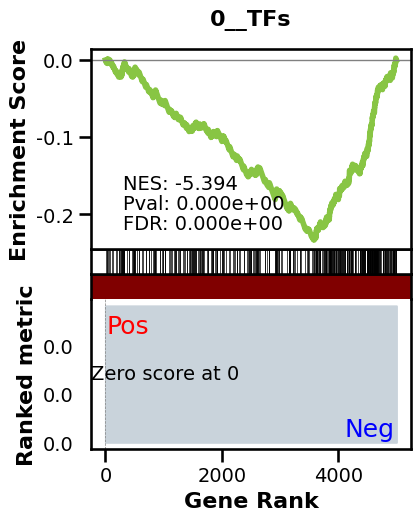

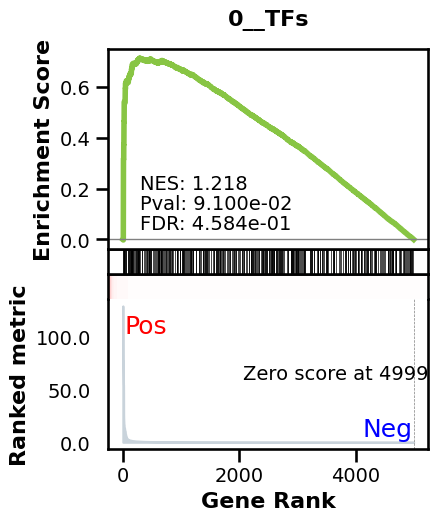

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.18it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.18it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.06it/s]

 19%|█▉        | 24/128 [00:00<00:01, 58.05it/s]

 23%|██▎       | 30/128 [00:00<00:01, 58.06it/s]

 28%|██▊       | 36/128 [00:00<00:01, 58.05it/s]

 33%|███▎      | 42/128 [00:00<00:01, 58.03it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.11it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.08it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.08it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.08it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.07it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.03it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.09it/s]

 70%|███████   | 90/128 [00:01<00:00, 58.04it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.98it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.93it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.98it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 58.04it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 58.05it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 58.03it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 57.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.000872925772492089
EPR: 0.602959247805673


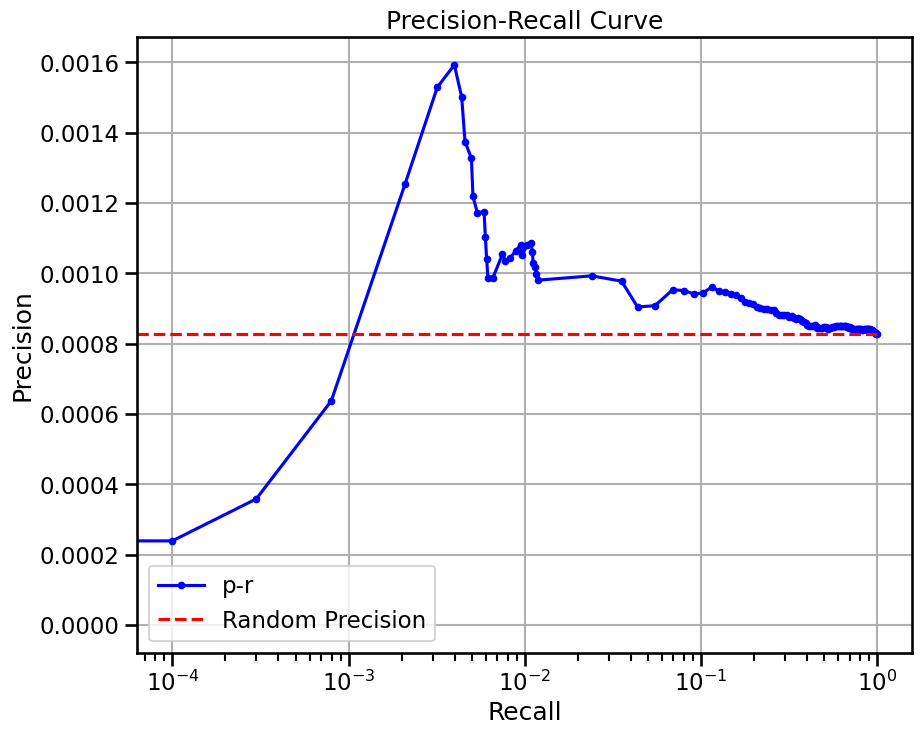

train classifier


true elem 10028 ...


doing classification....


metrics {'used_heads': 1, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


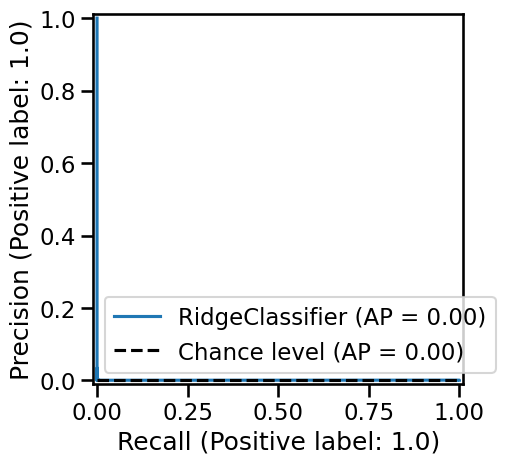

scprint_benchmark2
base enrichment


Top central genes: []


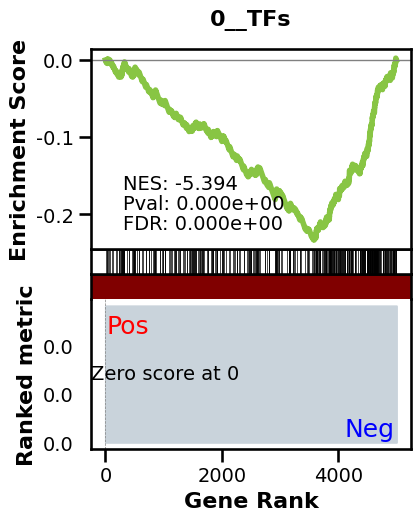

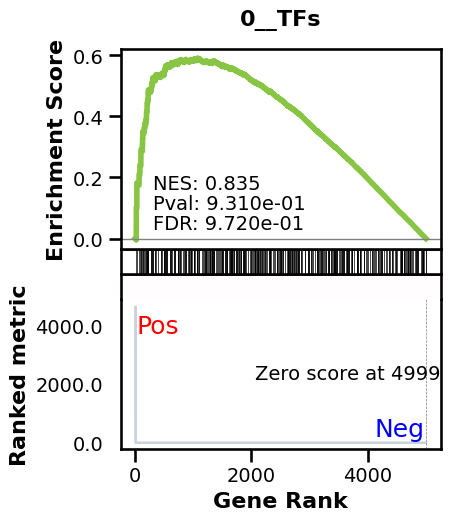

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.09it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.93it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.02it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.10it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.08it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.11it/s]

 33%|███▎      | 42/128 [00:00<00:01, 59.09it/s]

 38%|███▊      | 48/128 [00:00<00:01, 59.03it/s]

 42%|████▏     | 54/128 [00:00<00:01, 59.02it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.98it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.99it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 59.01it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.98it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 59.06it/s]

 70%|███████   | 90/128 [00:01<00:00, 59.08it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 59.07it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 59.10it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 59.13it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 59.17it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 59.04it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 59.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.02it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00079320715326562
EPR: 2.9052129647940905


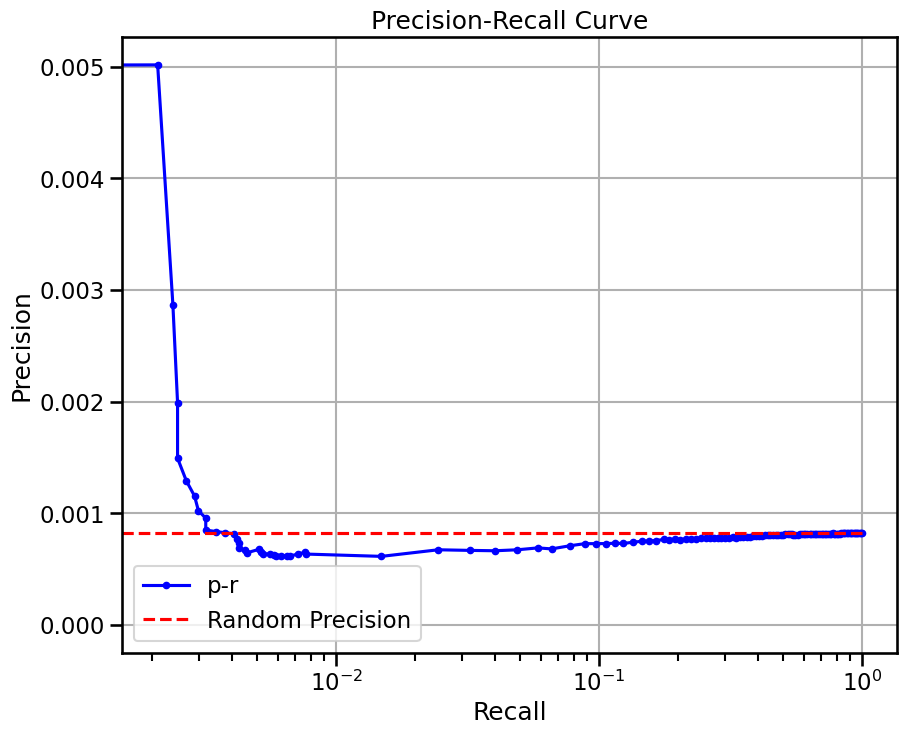

  0%|          | 0/17 [00:00<?, ?it/s]

  6%|▌         | 1/17 [00:02<00:44,  2.75s/it]

 12%|█▏        | 2/17 [00:04<00:29,  1.94s/it]

 18%|█▊        | 3/17 [00:05<00:23,  1.66s/it]

 24%|██▎       | 4/17 [00:06<00:20,  1.59s/it]

 29%|██▉       | 5/17 [00:09<00:23,  1.96s/it]

 35%|███▌      | 6/17 [00:11<00:20,  1.90s/it]

 41%|████      | 7/17 [00:12<00:17,  1.78s/it]

 47%|████▋     | 8/17 [00:14<00:14,  1.66s/it]

 53%|█████▎    | 9/17 [00:15<00:12,  1.58s/it]

 59%|█████▉    | 10/17 [00:17<00:10,  1.54s/it]

 65%|██████▍   | 11/17 [00:18<00:09,  1.62s/it]

 71%|███████   | 12/17 [00:20<00:07,  1.56s/it]

 76%|███████▋  | 13/17 [00:21<00:05,  1.49s/it]

 82%|████████▏ | 14/17 [00:24<00:05,  1.84s/it]

 88%|████████▊ | 15/17 [00:25<00:03,  1.66s/it]

 94%|█████████▍| 16/17 [00:26<00:01,  1.57s/it]

100%|██████████| 17/17 [00:27<00:00,  1.20s/it]

100%|██████████| 17/17 [00:27<00:00,  1.61s/it]

base enrichment


Top central genes: []


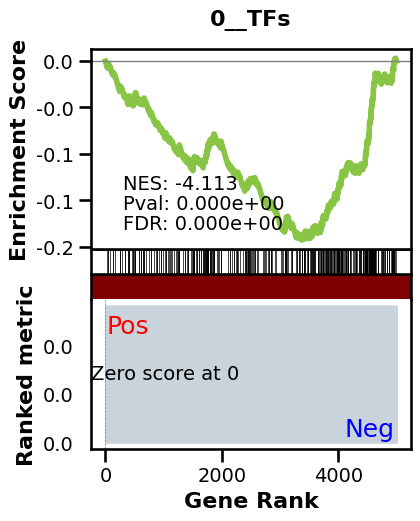

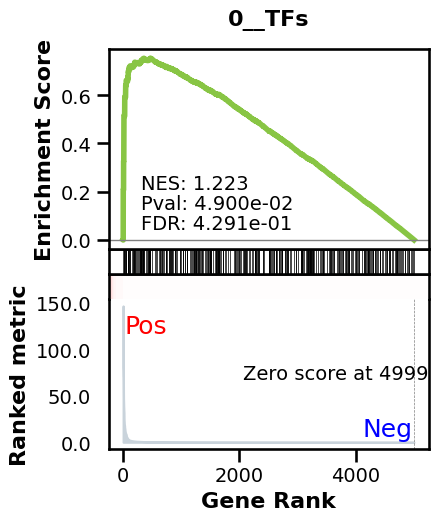

_________________________________________
TF specific enrichment


found some significant results for  23.076923076923077 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 62.48it/s]

 11%|█         | 14/128 [00:00<00:01, 62.64it/s]

 16%|█▋        | 21/128 [00:00<00:01, 62.84it/s]

 22%|██▏       | 28/128 [00:00<00:01, 63.04it/s]

 27%|██▋       | 35/128 [00:00<00:01, 62.87it/s]

 33%|███▎      | 42/128 [00:00<00:01, 62.78it/s]

 38%|███▊      | 49/128 [00:00<00:01, 63.00it/s]

 44%|████▍     | 56/128 [00:00<00:01, 63.03it/s]

 49%|████▉     | 63/128 [00:01<00:01, 63.12it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 62.96it/s]

 60%|██████    | 77/128 [00:01<00:00, 63.03it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 63.07it/s]

 71%|███████   | 91/128 [00:01<00:00, 63.21it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 63.14it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 63.13it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 63.24it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 62.75it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 62.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 62.94it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008441064477729894
EPR: 1.4749534467523804


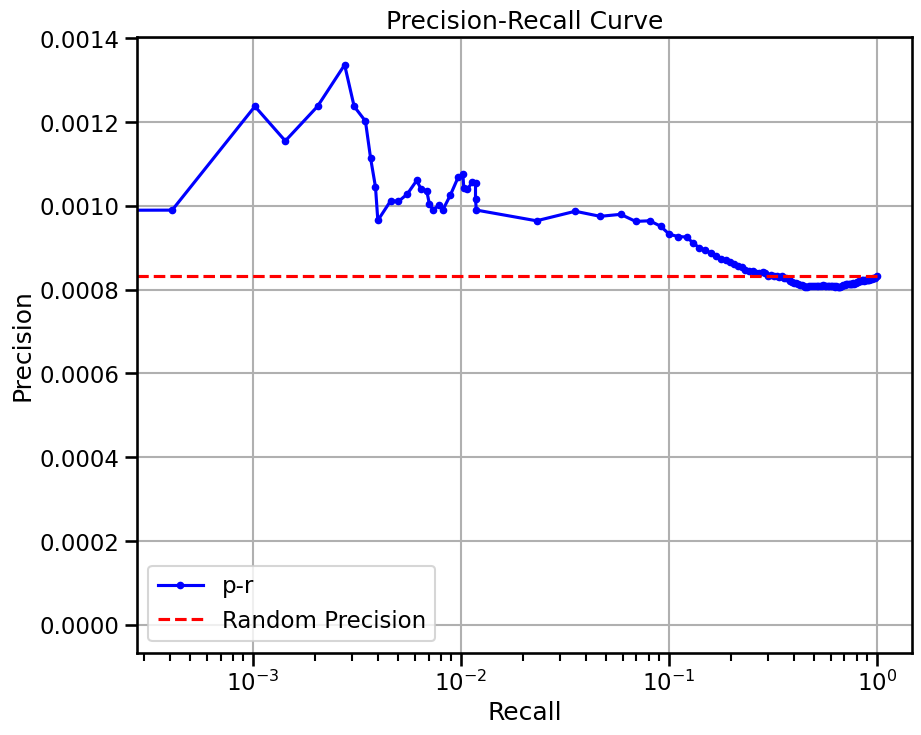

scprint_benchmark2
base enrichment


Top central genes: []


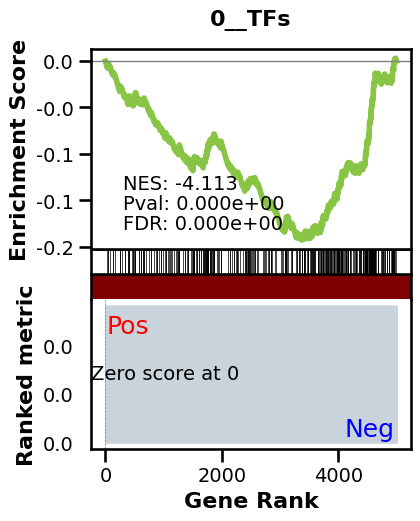

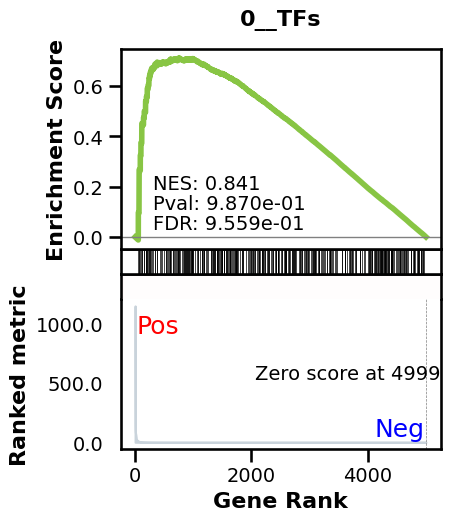

_________________________________________
TF specific enrichment


found some significant results for  15.384615384615385 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.79it/s]

 11%|█         | 14/128 [00:00<00:01, 61.43it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.37it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.38it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.59it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.25it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.01it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.94it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.84it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.17it/s]

 60%|██████    | 77/128 [00:01<00:00, 61.05it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.87it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.99it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 61.01it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 61.30it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 61.17it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 61.06it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 61.23it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 61.11it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0007427436996456211
EPR: 0.6136824285444141


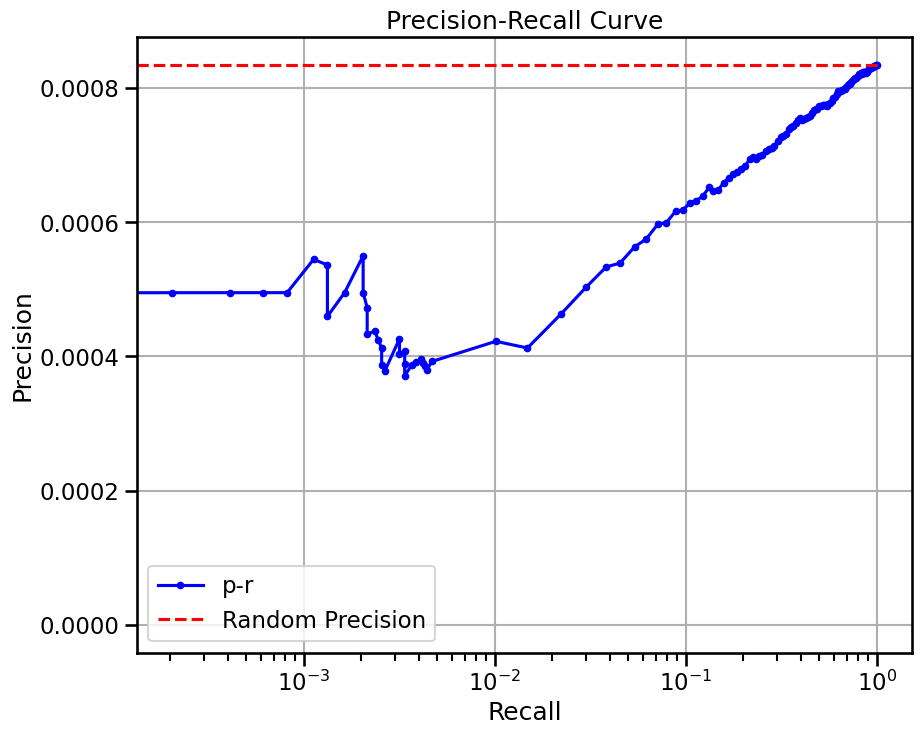

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:50,  2.41s/it]

  9%|▉         | 2/22 [00:03<00:34,  1.73s/it]

 14%|█▎        | 3/22 [00:04<00:28,  1.51s/it]

 18%|█▊        | 4/22 [00:06<00:25,  1.41s/it]

 23%|██▎       | 5/22 [00:07<00:23,  1.36s/it]

 27%|██▋       | 6/22 [00:08<00:21,  1.32s/it]

 32%|███▏      | 7/22 [00:09<00:19,  1.29s/it]

 36%|███▋      | 8/22 [00:11<00:17,  1.27s/it]

 41%|████      | 9/22 [00:12<00:16,  1.26s/it]

 45%|████▌     | 10/22 [00:13<00:15,  1.30s/it]

 50%|█████     | 11/22 [00:15<00:14,  1.33s/it]

 55%|█████▍    | 12/22 [00:16<00:13,  1.33s/it]

 59%|█████▉    | 13/22 [00:17<00:11,  1.33s/it]

 64%|██████▎   | 14/22 [00:19<00:10,  1.33s/it]

 68%|██████▊   | 15/22 [00:20<00:09,  1.34s/it]

 73%|███████▎  | 16/22 [00:21<00:08,  1.34s/it]

 77%|███████▋  | 17/22 [00:23<00:06,  1.34s/it]

 82%|████████▏ | 18/22 [00:24<00:05,  1.32s/it]

 86%|████████▋ | 19/22 [00:25<00:03,  1.32s/it]

 91%|█████████ | 20/22 [00:27<00:02,  1.31s/it]

 95%|█████████▌| 21/22 [00:28<00:01,  1.31s/it]

100%|██████████| 22/22 [00:29<00:00,  1.19s/it]

100%|██████████| 22/22 [00:29<00:00,  1.34s/it]

base enrichment


Top central genes: []


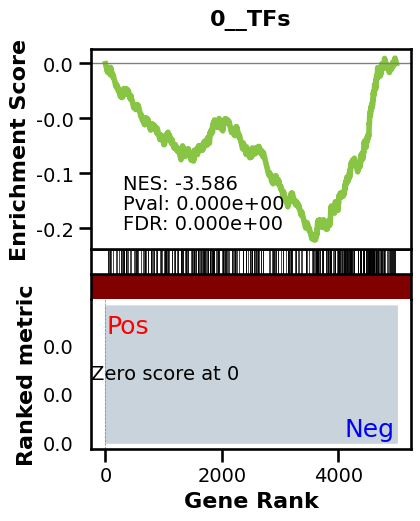

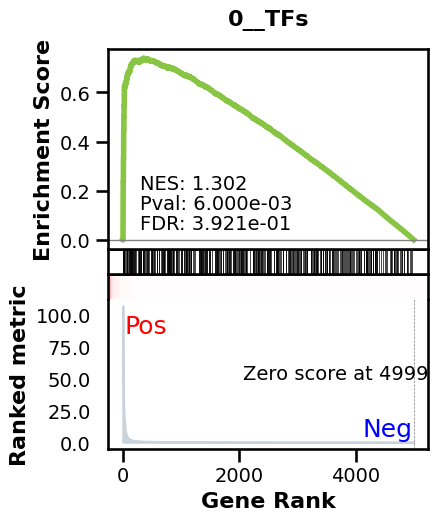

_________________________________________
TF specific enrichment


found some significant results for  20.3125 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.90it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.70it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.68it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.76it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.65it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.68it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.75it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.78it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.83it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.66it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.75it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.76it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.78it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.83it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.82it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.57it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.66it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.68it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.73it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.76it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.70it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014044802930353604
EPR: 1.2246527380861658


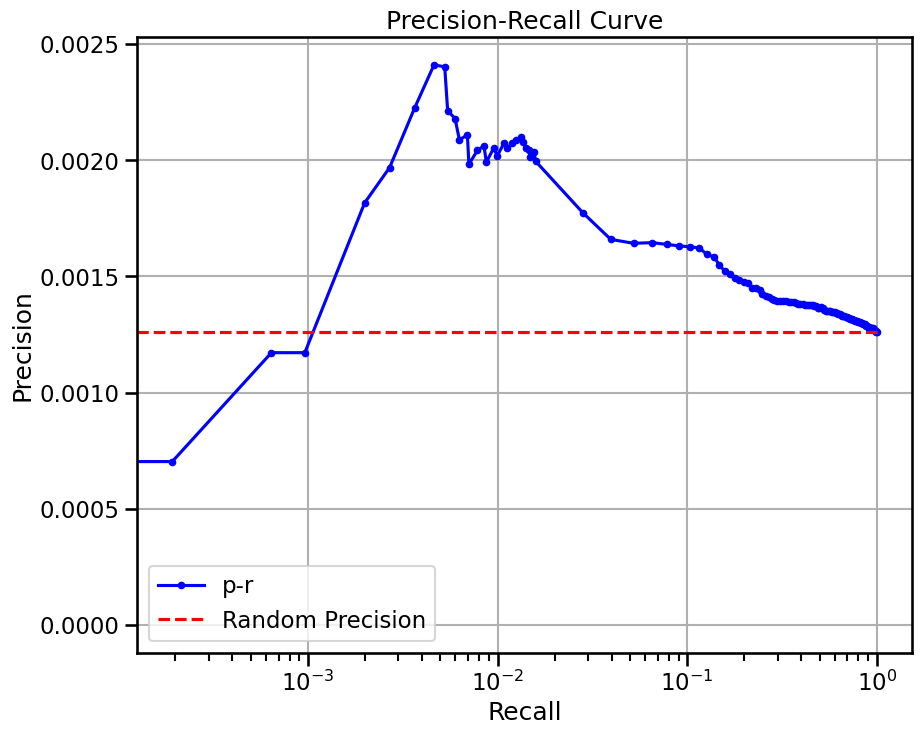

scprint_benchmark2
base enrichment


Top central genes: []


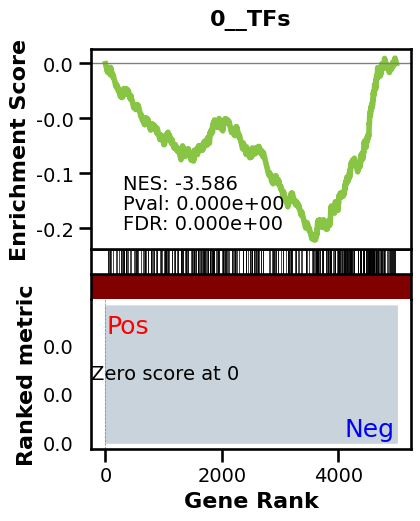

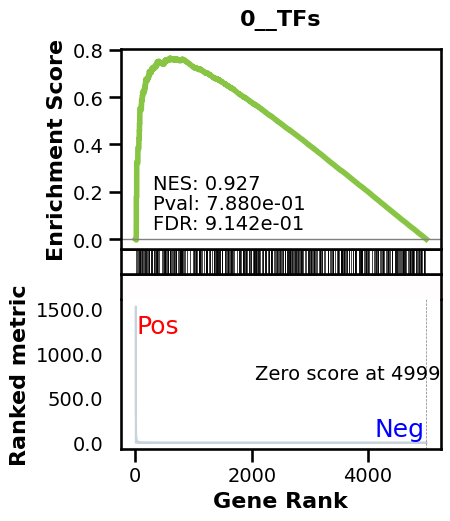

_________________________________________
TF specific enrichment


found some significant results for  7.8125 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.53it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.41it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.41it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.37it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.43it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.40it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.33it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.34it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.29it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.31it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.37it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.35it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.40it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.43it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.43it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.44it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.44it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.43it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.42it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.44it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.47it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.38it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012585546751609812
EPR: 1.1223094829183868


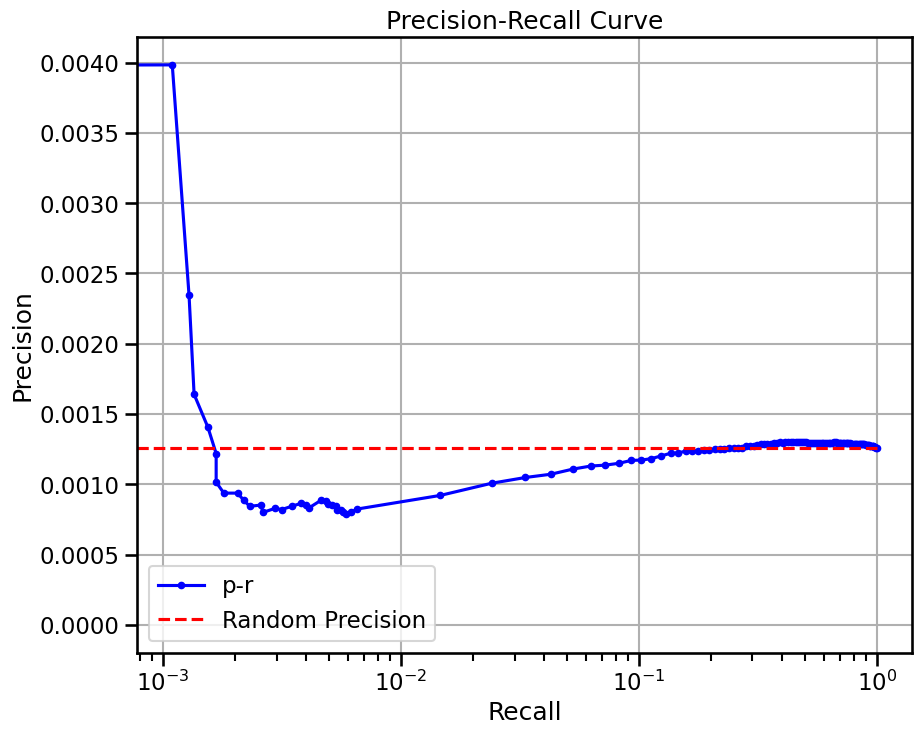

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

base enrichment


Top central genes: []


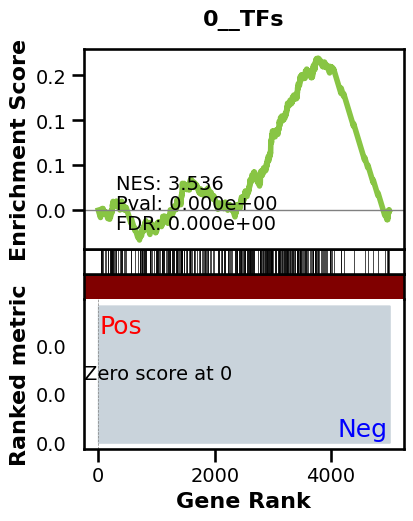

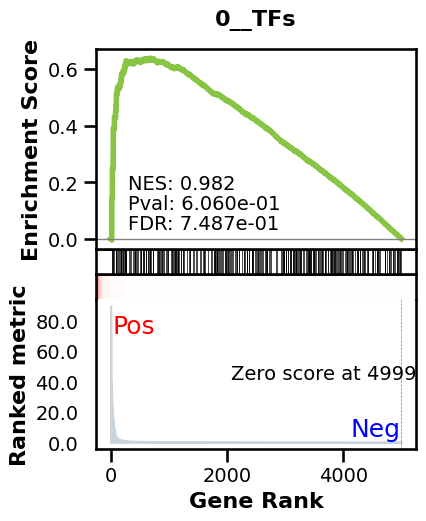

_________________________________________
TF specific enrichment


found some significant results for  50.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 90.20it/s]

 16%|█▌        | 20/128 [00:00<00:01, 90.01it/s]

 23%|██▎       | 30/128 [00:00<00:01, 89.95it/s]

 31%|███▏      | 40/128 [00:00<00:00, 90.00it/s]

 39%|███▉      | 50/128 [00:00<00:00, 90.02it/s]

 47%|████▋     | 60/128 [00:00<00:00, 90.04it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 90.05it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 90.08it/s]

 70%|███████   | 90/128 [00:00<00:00, 90.07it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 90.10it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 89.89it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 89.88it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 89.79it/s]

100%|██████████| 128/128 [00:01<00:00, 89.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014635594535184092
EPR: 1.5091814951374856


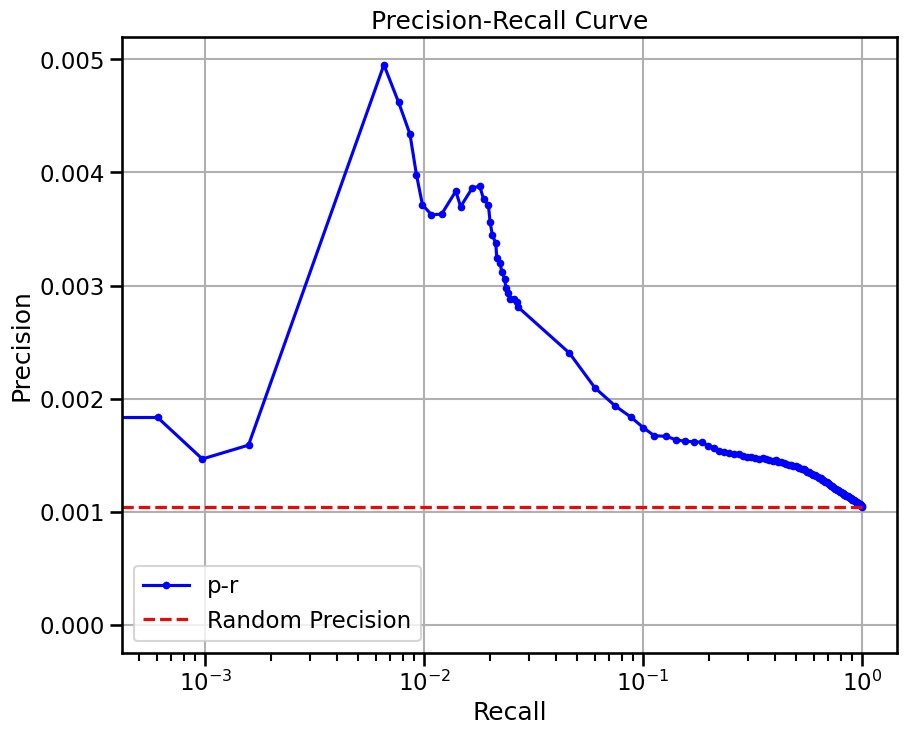

scprint_benchmark2
base enrichment


Top central genes: []


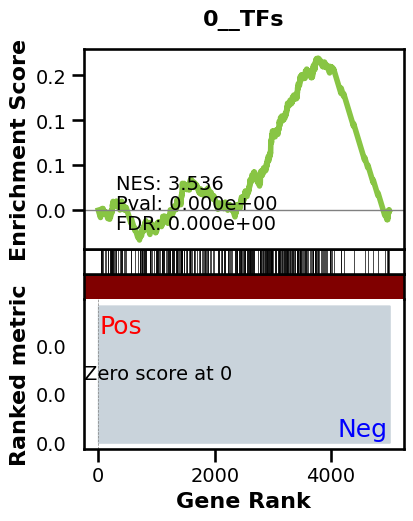

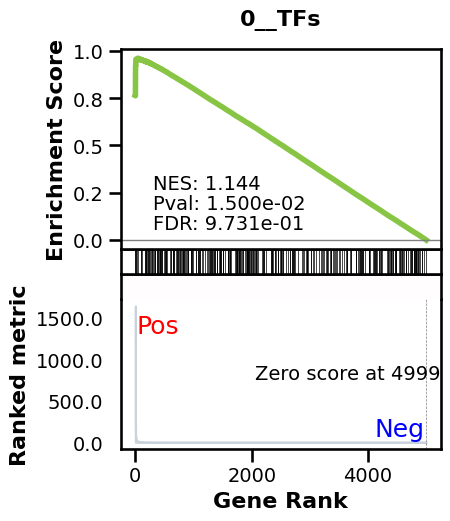

_________________________________________
TF specific enrichment


found some significant results for  28.125 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 91.40it/s]

 16%|█▌        | 20/128 [00:00<00:01, 91.29it/s]

 23%|██▎       | 30/128 [00:00<00:01, 90.10it/s]

 31%|███▏      | 40/128 [00:00<00:00, 90.50it/s]

 39%|███▉      | 50/128 [00:00<00:00, 90.14it/s]

 47%|████▋     | 60/128 [00:00<00:00, 89.93it/s]

 54%|█████▍    | 69/128 [00:00<00:00, 89.80it/s]

 61%|██████    | 78/128 [00:00<00:00, 89.80it/s]

 68%|██████▊   | 87/128 [00:00<00:00, 89.75it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 89.80it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 89.34it/s]

 90%|████████▉ | 115/128 [00:01<00:00, 89.58it/s]

 97%|█████████▋| 124/128 [00:01<00:00, 89.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 89.85it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011253629523769616
EPR: 2.559588615460732


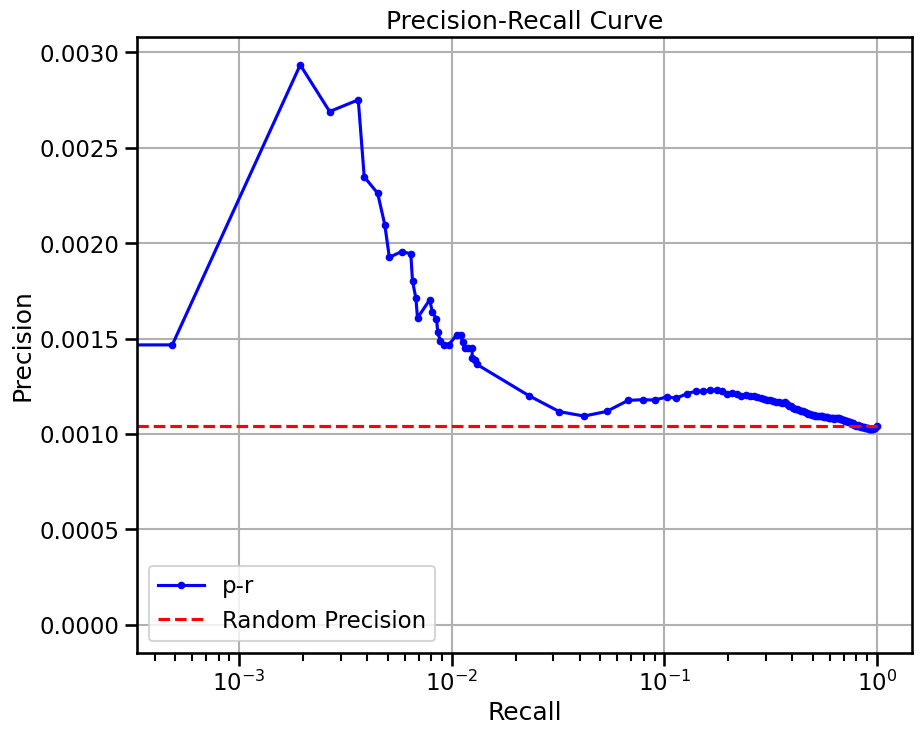

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:02<00:31,  2.43s/it]

 14%|█▍        | 2/14 [00:03<00:21,  1.77s/it]

 21%|██▏       | 3/14 [00:05<00:17,  1.56s/it]

 29%|██▊       | 4/14 [00:06<00:14,  1.47s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.45s/it]

 43%|████▎     | 6/14 [00:09<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:11<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.19s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

base enrichment


Top central genes: []


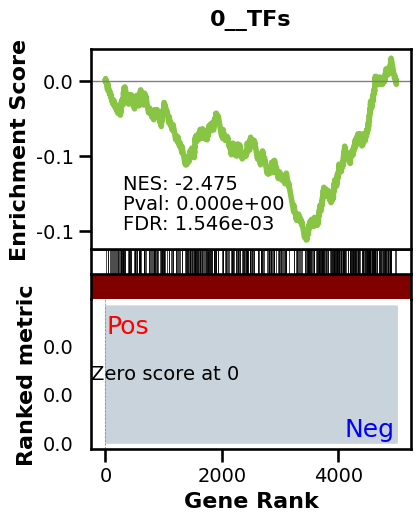

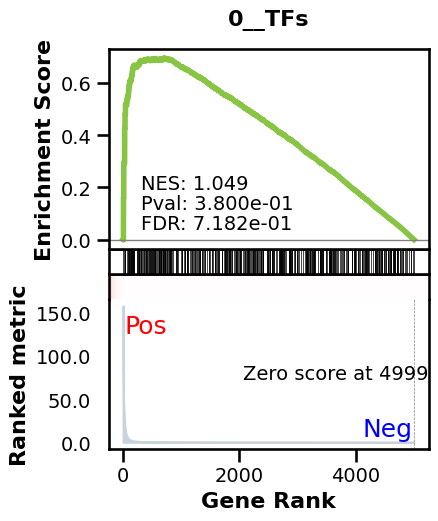

_________________________________________
TF specific enrichment


found some significant results for  45.45454545454545 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.57it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.66it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.47it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.48it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.61it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.70it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.72it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.42it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.42it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.52it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.60it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.63it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.62it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.42it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.52it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.62it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.63it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.74it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.72it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.75it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001950176528441145


EPR: 1.8786039099354943


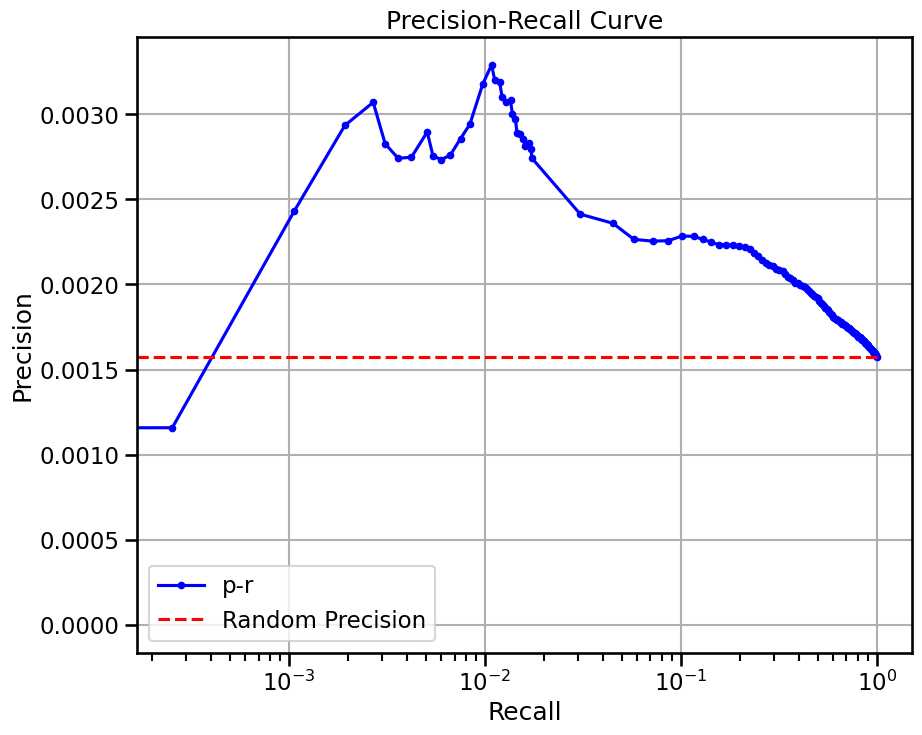

scprint_benchmark2
base enrichment


Top central genes: []


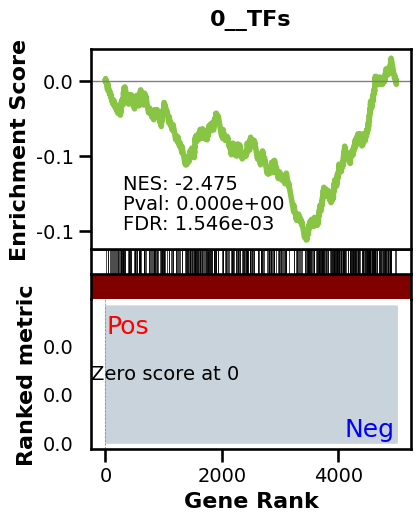

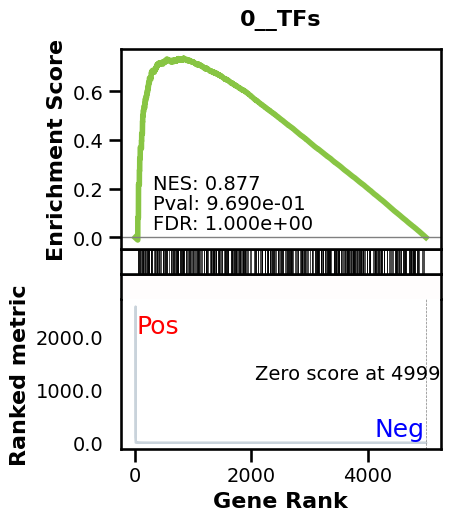

_________________________________________
TF specific enrichment


found some significant results for  10.909090909090908 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 53.76it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.69it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.60it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.62it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.70it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.74it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.73it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.71it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.74it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.77it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.72it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.72it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.69it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.72it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.71it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.74it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.81it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.77it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.87it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.90it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.74it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016936511018355133
EPR: 1.0661406911019171


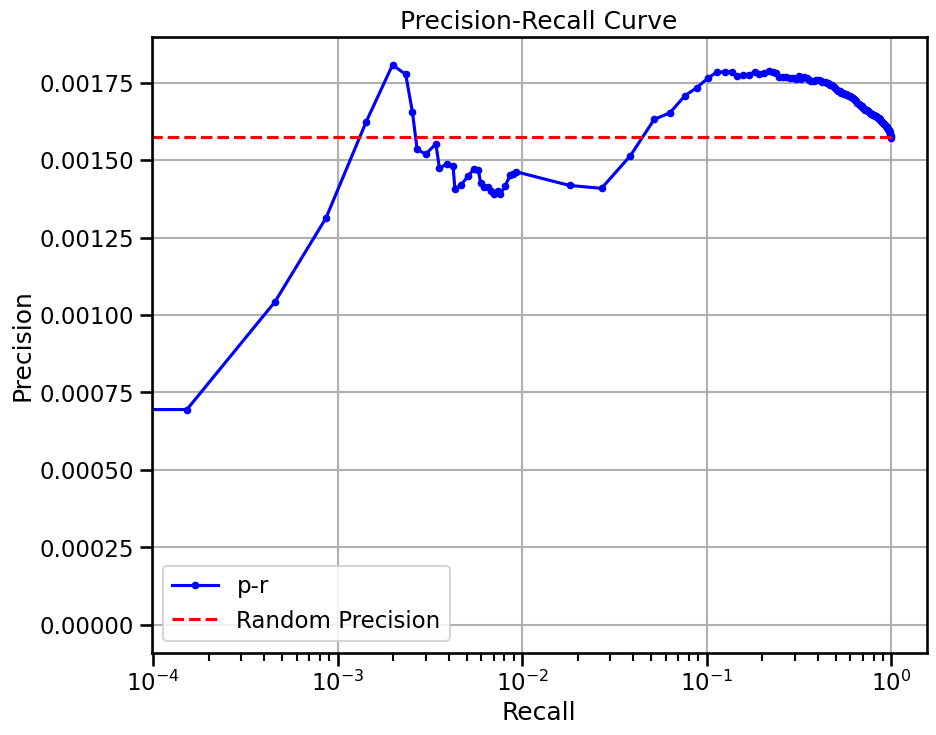

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:54,  2.62s/it]

  9%|▉         | 2/22 [00:03<00:37,  1.88s/it]

 14%|█▎        | 3/22 [00:05<00:31,  1.65s/it]

 18%|█▊        | 4/22 [00:06<00:27,  1.54s/it]

 23%|██▎       | 5/22 [00:08<00:25,  1.47s/it]

 27%|██▋       | 6/22 [00:09<00:23,  1.44s/it]

 32%|███▏      | 7/22 [00:10<00:21,  1.43s/it]

 36%|███▋      | 8/22 [00:12<00:19,  1.42s/it]

 41%|████      | 9/22 [00:13<00:18,  1.40s/it]

 45%|████▌     | 10/22 [00:14<00:16,  1.39s/it]

 50%|█████     | 11/22 [00:16<00:15,  1.38s/it]

 55%|█████▍    | 12/22 [00:17<00:13,  1.38s/it]

 59%|█████▉    | 13/22 [00:19<00:12,  1.37s/it]

 64%|██████▎   | 14/22 [00:20<00:10,  1.37s/it]

 68%|██████▊   | 15/22 [00:21<00:09,  1.37s/it]

 73%|███████▎  | 16/22 [00:23<00:08,  1.37s/it]

 77%|███████▋  | 17/22 [00:24<00:06,  1.37s/it]

 82%|████████▏ | 18/22 [00:25<00:05,  1.37s/it]

 86%|████████▋ | 19/22 [00:27<00:04,  1.37s/it]

 91%|█████████ | 20/22 [00:28<00:02,  1.37s/it]

 95%|█████████▌| 21/22 [00:30<00:01,  1.37s/it]

100%|██████████| 22/22 [00:31<00:00,  1.35s/it]

100%|██████████| 22/22 [00:31<00:00,  1.43s/it]

base enrichment


Top central genes: []


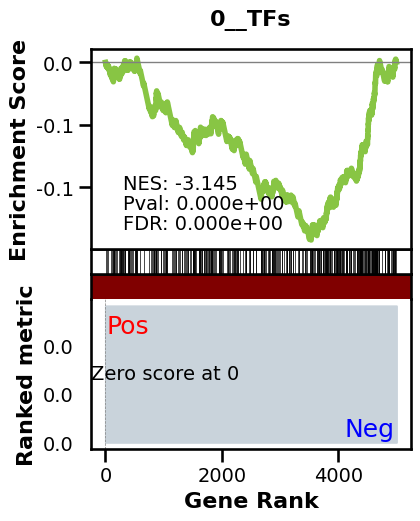

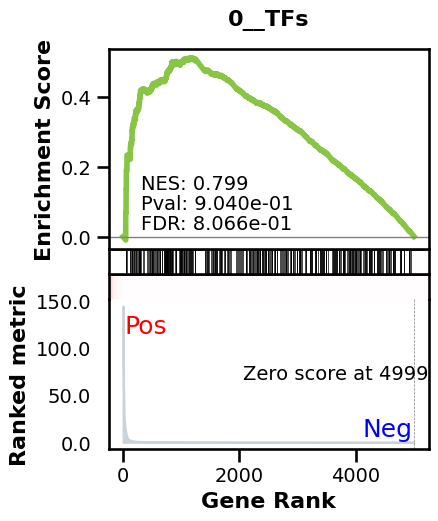

_________________________________________
TF specific enrichment


found some significant results for  31.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.95it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.92it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.98it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.99it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.97it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.96it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.94it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.92it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.93it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.90it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.88it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.92it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.92it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.91it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.88it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.88it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.89it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.89it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.91it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.93it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.88it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001616687099283381
EPR: 3.8831690347303054


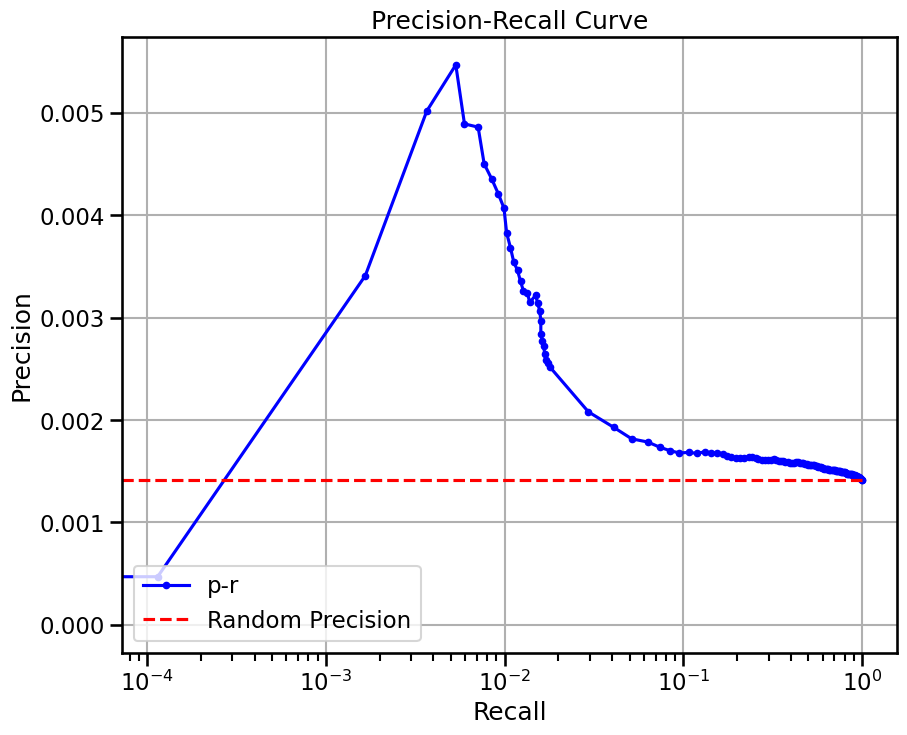

scprint_benchmark2
base enrichment


Top central genes: []


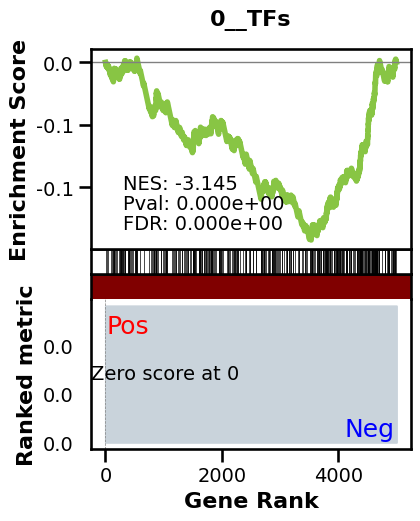

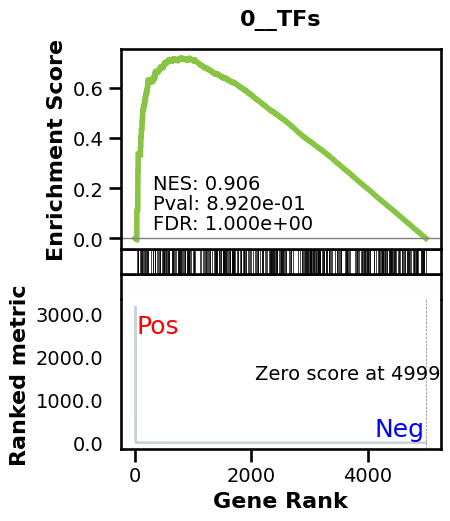

_________________________________________
TF specific enrichment


found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.27it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.18it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.11it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.67it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.80it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.90it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.94it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.99it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.99it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.03it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.00it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.86it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.78it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.90it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.94it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.00it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.07it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.08it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.09it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.06it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.95it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014608488607239355
EPR: 0.7698652929626851


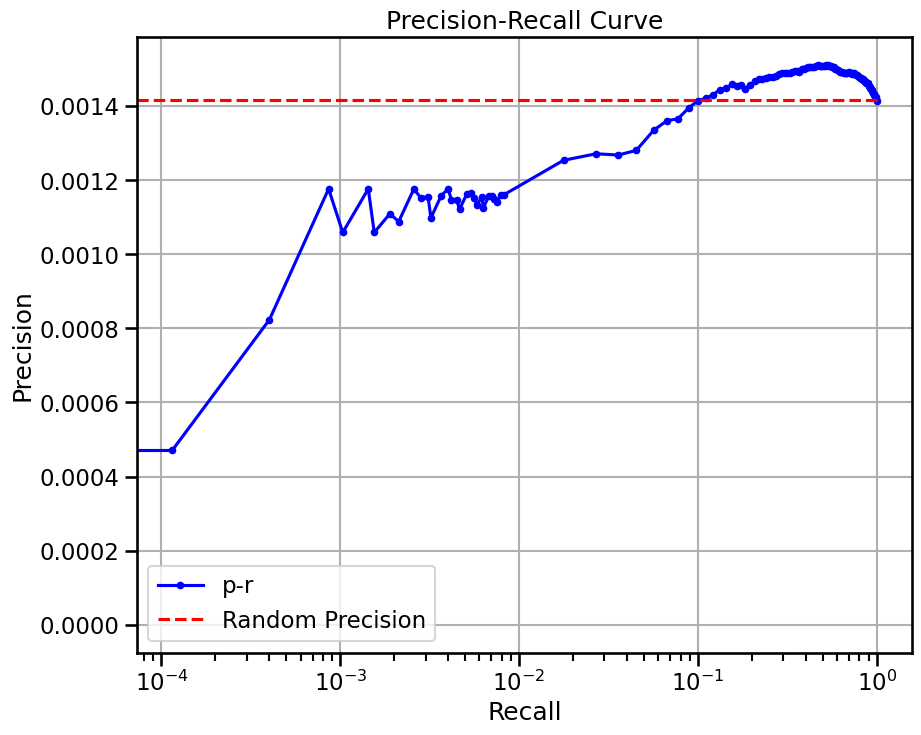

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:02<00:04,  2.41s/it]

 67%|██████▋   | 2/3 [00:03<00:01,  1.76s/it]

100%|██████████| 3/3 [00:05<00:00,  1.95s/it]

100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

base enrichment


Top central genes: []


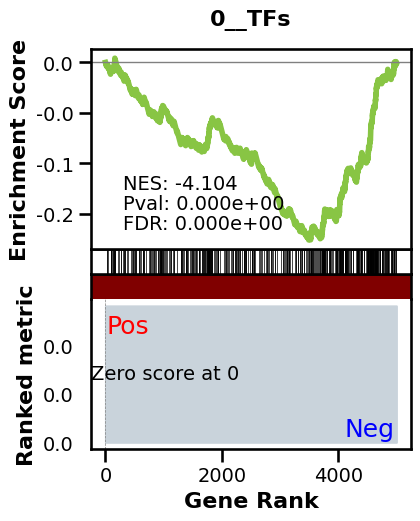

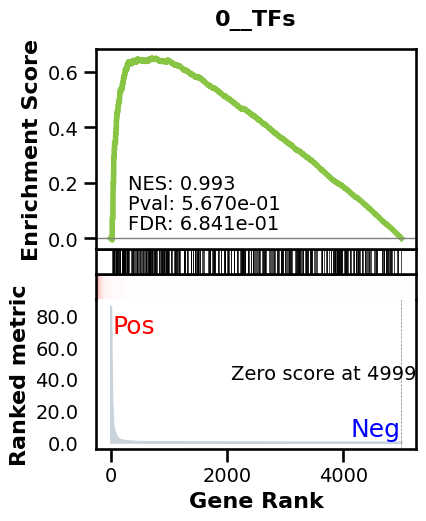

_________________________________________
TF specific enrichment


found some significant results for  28.571428571428573 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.61it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.60it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.49it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.59it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.65it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.98it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.17it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.32it/s]

 42%|████▏     | 54/128 [00:00<00:01, 53.87it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.62it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.47it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.45it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.49it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.57it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.62it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.62it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.34it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.25it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.27it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.27it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.24it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.61it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016050691640250893
EPR: 1.0081707312647852


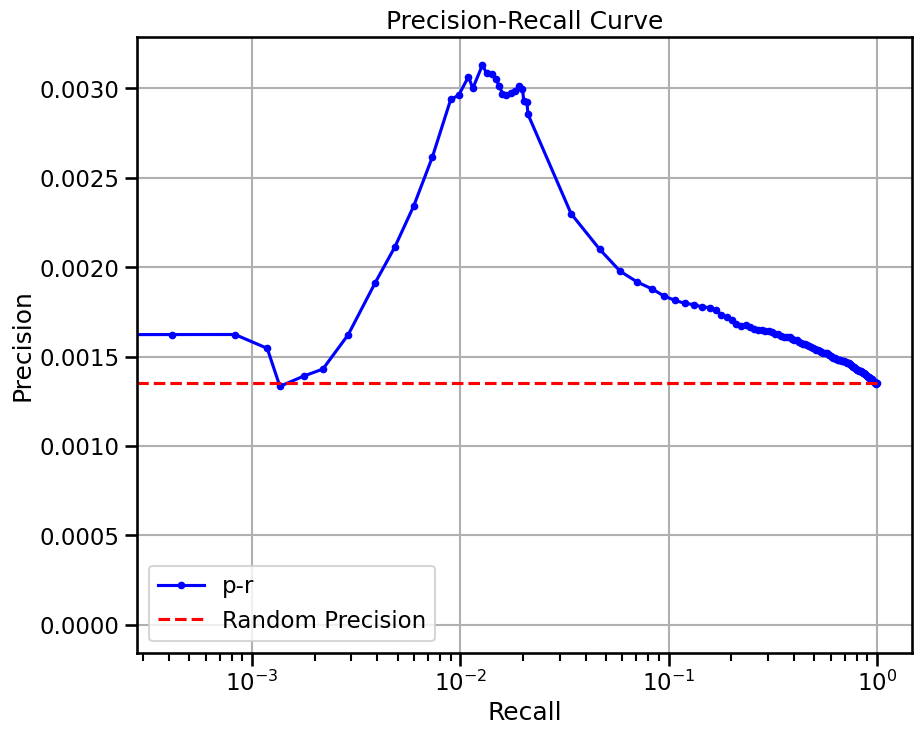

scprint_benchmark2
base enrichment


Top central genes: []


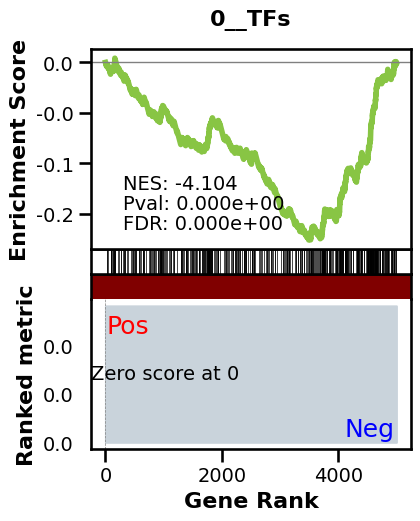

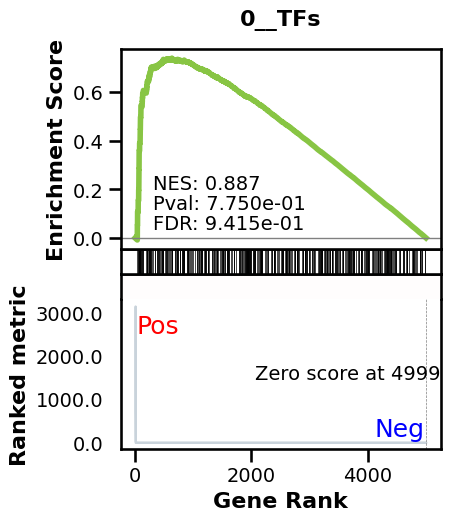

_________________________________________
TF specific enrichment


found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.33it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.33it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.38it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.43it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.39it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.37it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.86it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.35it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.67it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.90it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.06it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.89it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.00it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.14it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.22it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.26it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.30it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.23it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.28it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.32it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.07it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016487176038714724
EPR: 3.798024994905563


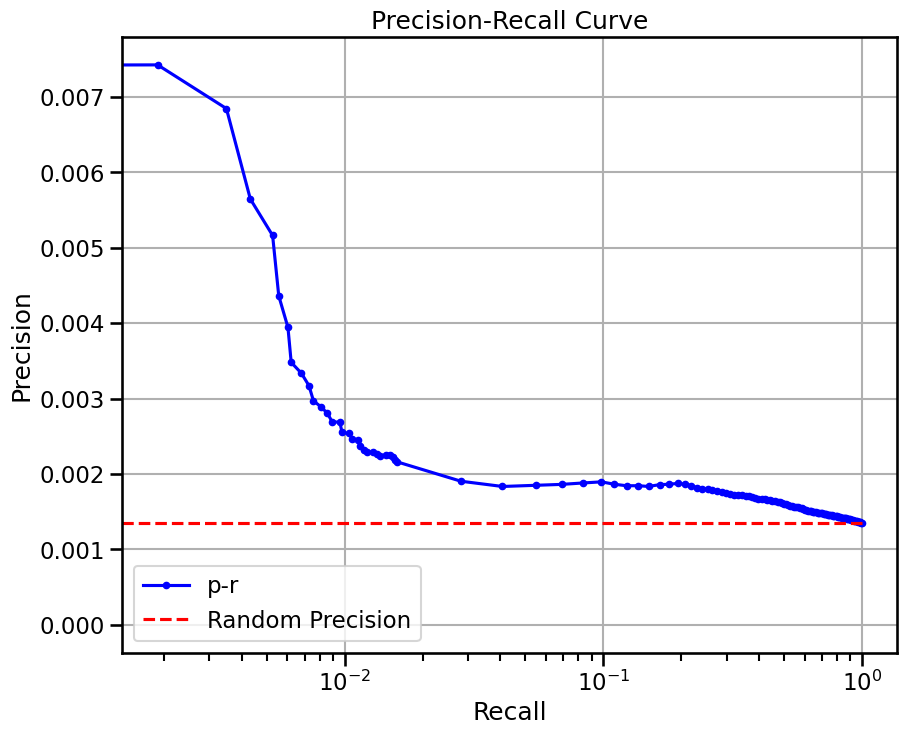

  0%|          | 0/16 [00:00<?, ?it/s]

  6%|▋         | 1/16 [00:02<00:36,  2.41s/it]

 12%|█▎        | 2/16 [00:03<00:23,  1.71s/it]

 19%|█▉        | 3/16 [00:04<00:19,  1.48s/it]

 25%|██▌       | 4/16 [00:06<00:16,  1.38s/it]

 31%|███▏      | 5/16 [00:07<00:14,  1.32s/it]

 38%|███▊      | 6/16 [00:08<00:12,  1.29s/it]

 44%|████▍     | 7/16 [00:09<00:11,  1.26s/it]

 50%|█████     | 8/16 [00:10<00:09,  1.25s/it]

 56%|█████▋    | 9/16 [00:12<00:08,  1.23s/it]

 62%|██████▎   | 10/16 [00:13<00:07,  1.22s/it]

 69%|██████▉   | 11/16 [00:14<00:06,  1.22s/it]

 75%|███████▌  | 12/16 [00:15<00:04,  1.21s/it]

 81%|████████▏ | 13/16 [00:16<00:03,  1.21s/it]

 88%|████████▊ | 14/16 [00:18<00:02,  1.21s/it]

 94%|█████████▍| 15/16 [00:19<00:01,  1.21s/it]

100%|██████████| 16/16 [00:20<00:00,  1.14s/it]

100%|██████████| 16/16 [00:20<00:00,  1.28s/it]

base enrichment


Top central genes: []


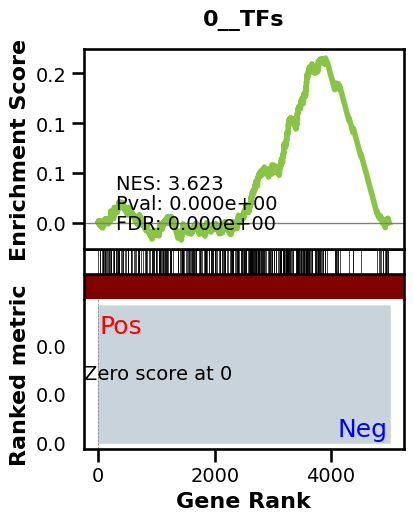

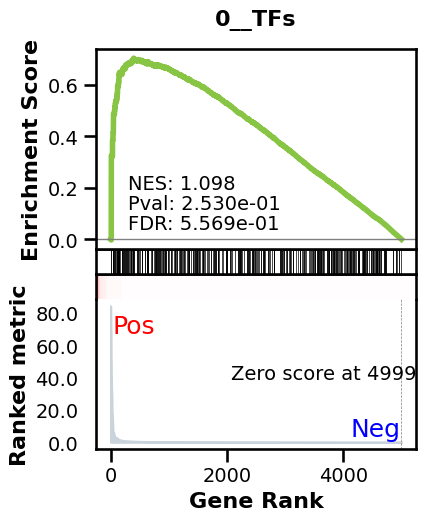

_________________________________________
TF specific enrichment


found some significant results for  50.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 88.09it/s]

 14%|█▍        | 18/128 [00:00<00:01, 89.02it/s]

 22%|██▏       | 28/128 [00:00<00:01, 89.91it/s]

 30%|██▉       | 38/128 [00:00<00:00, 90.38it/s]

 38%|███▊      | 48/128 [00:00<00:00, 90.68it/s]

 45%|████▌     | 58/128 [00:00<00:00, 89.55it/s]

 53%|█████▎    | 68/128 [00:00<00:00, 89.96it/s]

 61%|██████    | 78/128 [00:00<00:00, 90.41it/s]

 69%|██████▉   | 88/128 [00:00<00:00, 90.50it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 90.19it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 90.50it/s]

 92%|█████████▏| 118/128 [00:01<00:00, 90.70it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 90.63it/s]

100%|██████████| 128/128 [00:01<00:00, 90.24it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016583381926818094
EPR: 2.554046739229025


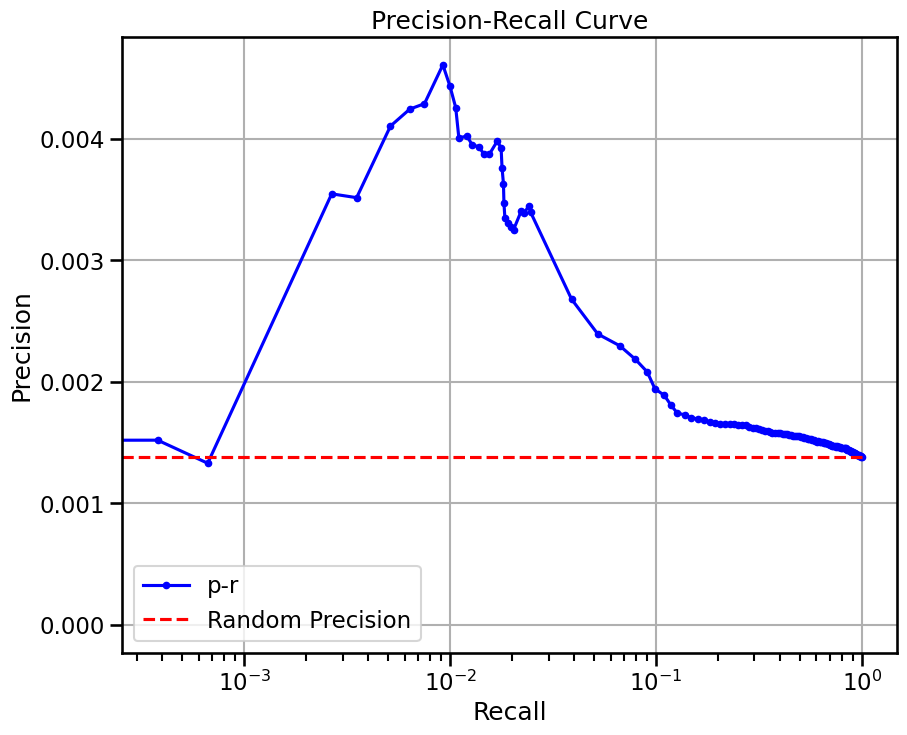

scprint_benchmark2
base enrichment


Top central genes: []


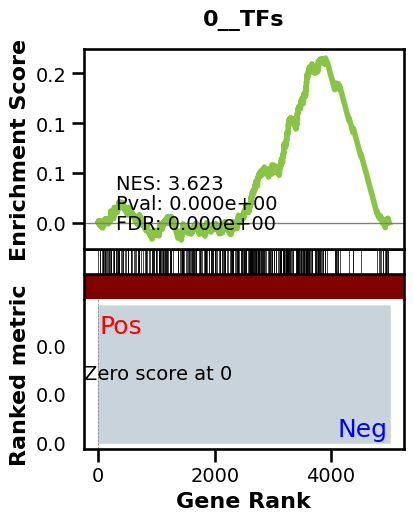

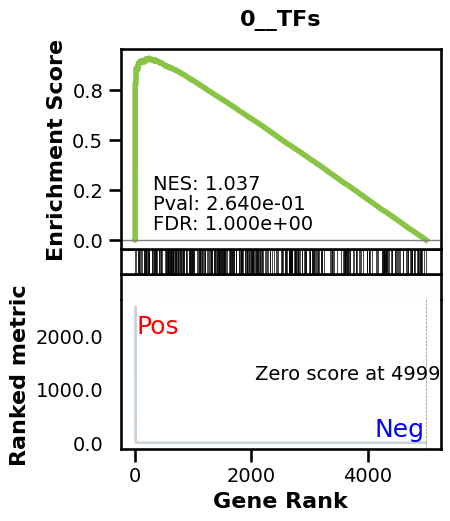

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 90.88it/s]

 16%|█▌        | 20/128 [00:00<00:01, 90.95it/s]

 23%|██▎       | 30/128 [00:00<00:01, 90.76it/s]

 31%|███▏      | 40/128 [00:00<00:00, 90.83it/s]

 39%|███▉      | 50/128 [00:00<00:00, 90.80it/s]

 47%|████▋     | 60/128 [00:00<00:00, 90.87it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 90.78it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 90.78it/s]

 70%|███████   | 90/128 [00:00<00:00, 90.71it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 90.73it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 90.80it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 90.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 90.76it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014389494351033532
EPR: 3.250522427733163


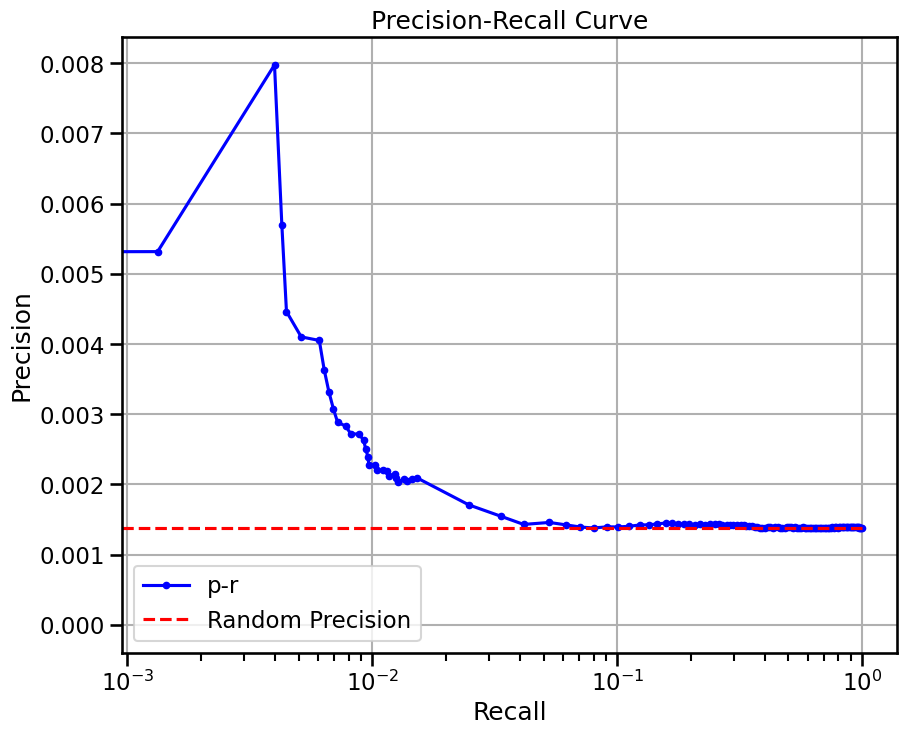

  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:02<00:29,  2.69s/it]

 17%|█▋        | 2/12 [00:04<00:22,  2.26s/it]

 25%|██▌       | 3/12 [00:05<00:16,  1.82s/it]

 33%|███▎      | 4/12 [00:07<00:12,  1.60s/it]

 42%|████▏     | 5/12 [00:08<00:10,  1.46s/it]

 50%|█████     | 6/12 [00:09<00:08,  1.37s/it]

 58%|█████▊    | 7/12 [00:10<00:06,  1.29s/it]

 67%|██████▋   | 8/12 [00:11<00:04,  1.23s/it]

 75%|███████▌  | 9/12 [00:12<00:03,  1.19s/it]

 83%|████████▎ | 10/12 [00:14<00:02,  1.17s/it]

 92%|█████████▏| 11/12 [00:15<00:01,  1.15s/it]

100%|██████████| 12/12 [00:15<00:00,  1.03it/s]

100%|██████████| 12/12 [00:15<00:00,  1.33s/it]

base enrichment


Top central genes: []


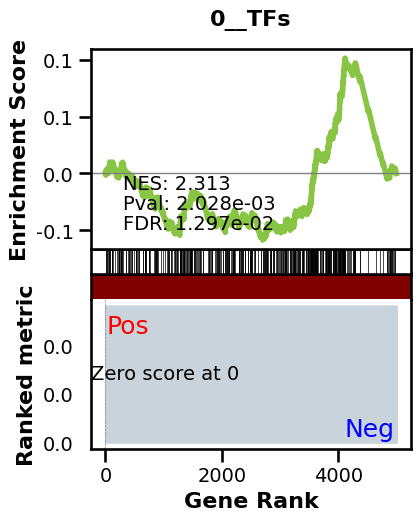

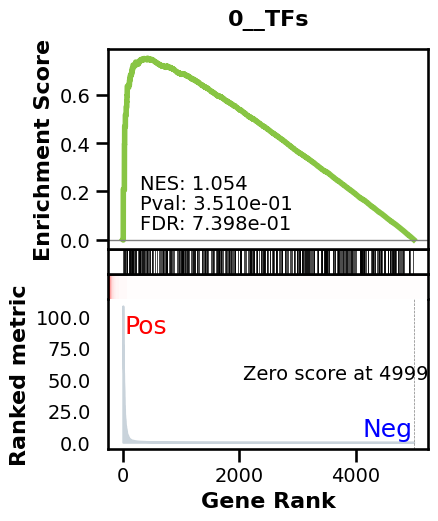

_________________________________________
TF specific enrichment


found some significant results for  33.333333333333336 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 68.23it/s]

 11%|█         | 14/128 [00:00<00:01, 68.26it/s]

 16%|█▋        | 21/128 [00:00<00:01, 68.27it/s]

 22%|██▏       | 28/128 [00:00<00:01, 68.29it/s]

 27%|██▋       | 35/128 [00:00<00:01, 66.86it/s]

 33%|███▎      | 42/128 [00:00<00:01, 66.39it/s]

 38%|███▊      | 49/128 [00:00<00:01, 66.07it/s]

 44%|████▍     | 56/128 [00:00<00:01, 65.88it/s]

 49%|████▉     | 63/128 [00:00<00:00, 65.76it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 65.69it/s]

 60%|██████    | 77/128 [00:01<00:00, 65.58it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 65.58it/s]

 71%|███████   | 91/128 [00:01<00:00, 65.58it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 65.67it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 65.91it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 65.97it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 66.16it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 66.29it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 66.22it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016861723876184314
EPR: 1.8824596049371927


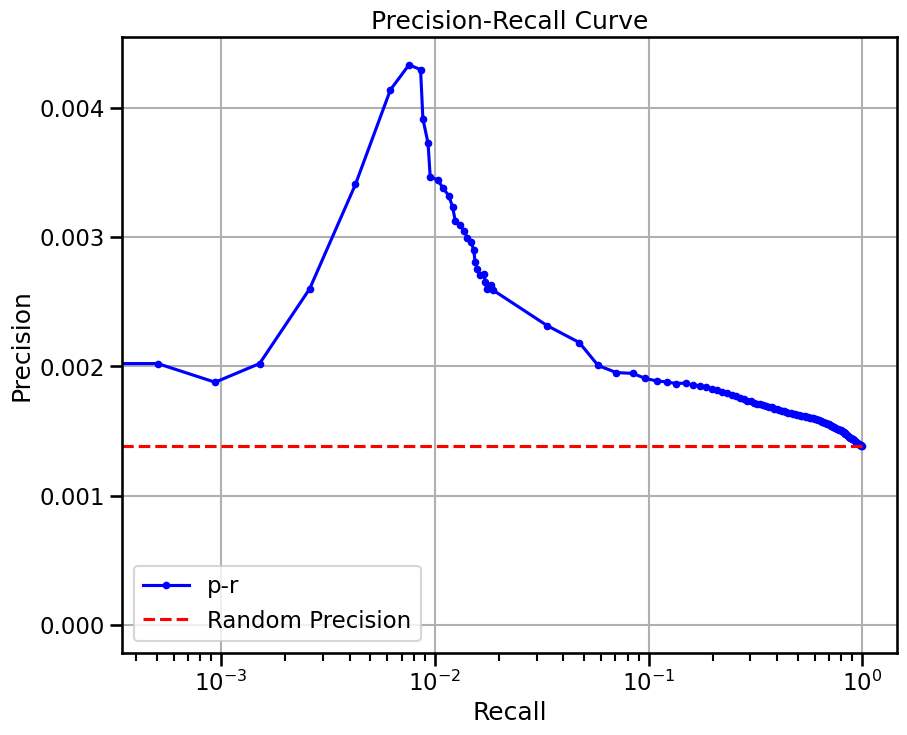

scprint_benchmark2
base enrichment


Top central genes: []


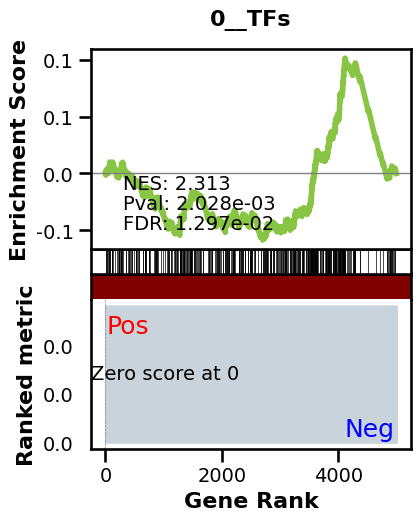

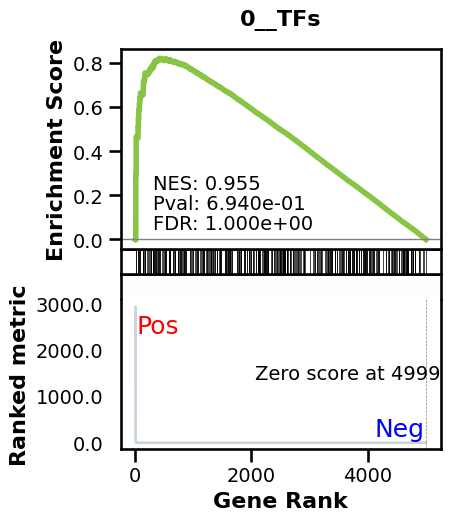

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 67.57it/s]

 11%|█         | 14/128 [00:00<00:01, 67.59it/s]

 16%|█▋        | 21/128 [00:00<00:01, 67.37it/s]

 22%|██▏       | 28/128 [00:00<00:01, 67.50it/s]

 27%|██▋       | 35/128 [00:00<00:01, 67.61it/s]

 33%|███▎      | 42/128 [00:00<00:01, 67.65it/s]

 38%|███▊      | 49/128 [00:00<00:01, 67.67it/s]

 44%|████▍     | 56/128 [00:00<00:01, 67.66it/s]

 49%|████▉     | 63/128 [00:00<00:00, 67.58it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 67.65it/s]

 60%|██████    | 77/128 [00:01<00:00, 67.65it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 67.65it/s]

 71%|███████   | 91/128 [00:01<00:00, 67.73it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 67.44it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 67.55it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 67.60it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 67.70it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 67.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 67.49it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014731933318115724
EPR: 1.3575898317283328


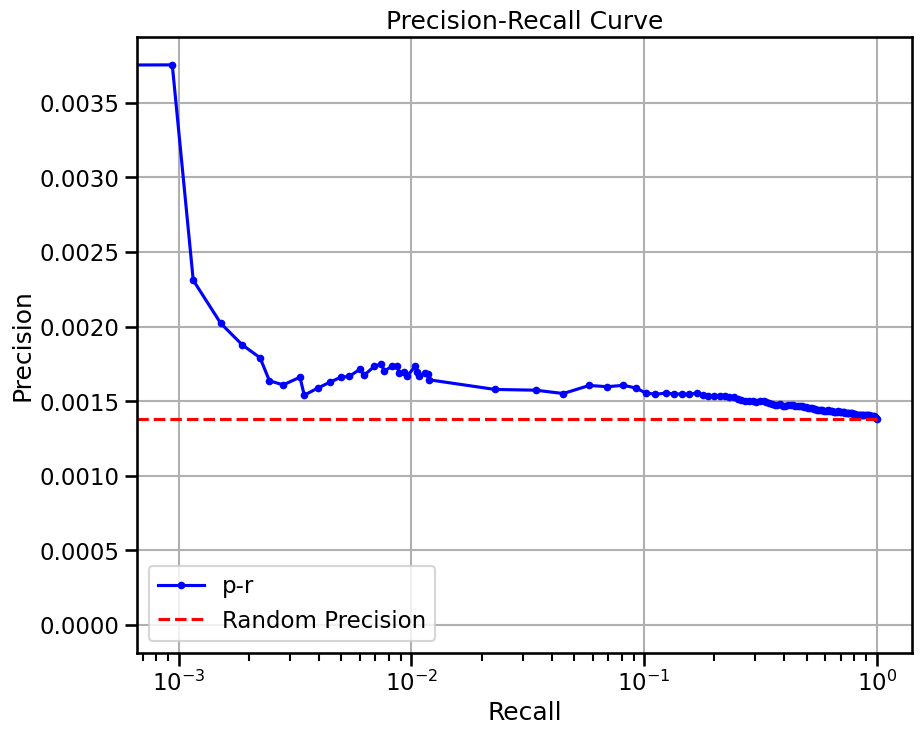

  0%|          | 0/64 [00:00<?, ?it/s]

  2%|▏         | 1/64 [00:02<02:32,  2.42s/it]

  3%|▎         | 2/64 [00:03<01:46,  1.71s/it]

  5%|▍         | 3/64 [00:04<01:30,  1.49s/it]

  6%|▋         | 4/64 [00:06<01:22,  1.38s/it]

  8%|▊         | 5/64 [00:07<01:18,  1.33s/it]

  9%|▉         | 6/64 [00:08<01:15,  1.30s/it]

 11%|█         | 7/64 [00:09<01:13,  1.28s/it]

 12%|█▎        | 8/64 [00:11<01:10,  1.26s/it]

 14%|█▍        | 9/64 [00:12<01:08,  1.25s/it]

 16%|█▌        | 10/64 [00:13<01:07,  1.24s/it]

 17%|█▋        | 11/64 [00:14<01:05,  1.23s/it]

 19%|█▉        | 12/64 [00:15<01:03,  1.23s/it]

 20%|██        | 13/64 [00:17<01:02,  1.22s/it]

 22%|██▏       | 14/64 [00:18<01:00,  1.21s/it]

 23%|██▎       | 15/64 [00:19<00:59,  1.20s/it]

 25%|██▌       | 16/64 [00:20<00:57,  1.20s/it]

 27%|██▋       | 17/64 [00:21<00:56,  1.20s/it]

 28%|██▊       | 18/64 [00:23<00:54,  1.19s/it]

 30%|██▉       | 19/64 [00:24<00:53,  1.19s/it]

 31%|███▏      | 20/64 [00:25<00:52,  1.18s/it]

 33%|███▎      | 21/64 [00:26<00:50,  1.18s/it]

 34%|███▍      | 22/64 [00:27<00:49,  1.18s/it]

 36%|███▌      | 23/64 [00:28<00:48,  1.17s/it]

 38%|███▊      | 24/64 [00:30<00:46,  1.17s/it]

 39%|███▉      | 25/64 [00:31<00:45,  1.17s/it]

 41%|████      | 26/64 [00:32<00:44,  1.17s/it]

 42%|████▏     | 27/64 [00:33<00:43,  1.17s/it]

 44%|████▍     | 28/64 [00:34<00:42,  1.17s/it]

 45%|████▌     | 29/64 [00:35<00:40,  1.17s/it]

 47%|████▋     | 30/64 [00:37<00:39,  1.17s/it]

 48%|████▊     | 31/64 [00:38<00:38,  1.17s/it]

 50%|█████     | 32/64 [00:39<00:37,  1.17s/it]

 52%|█████▏    | 33/64 [00:40<00:36,  1.17s/it]

 53%|█████▎    | 34/64 [00:41<00:35,  1.17s/it]

 55%|█████▍    | 35/64 [00:42<00:34,  1.17s/it]

 56%|█████▋    | 36/64 [00:44<00:32,  1.18s/it]

 58%|█████▊    | 37/64 [00:45<00:31,  1.18s/it]

 59%|█████▉    | 38/64 [00:46<00:30,  1.16s/it]

 61%|██████    | 39/64 [00:47<00:28,  1.15s/it]

 62%|██████▎   | 40/64 [00:48<00:27,  1.14s/it]

 64%|██████▍   | 41/64 [00:49<00:25,  1.13s/it]

 66%|██████▌   | 42/64 [00:50<00:24,  1.12s/it]

 67%|██████▋   | 43/64 [00:51<00:23,  1.11s/it]

 69%|██████▉   | 44/64 [00:53<00:22,  1.11s/it]

 70%|███████   | 45/64 [00:54<00:21,  1.12s/it]

 72%|███████▏  | 46/64 [00:55<00:20,  1.12s/it]

 73%|███████▎  | 47/64 [00:56<00:18,  1.11s/it]

 75%|███████▌  | 48/64 [00:57<00:17,  1.11s/it]

 77%|███████▋  | 49/64 [00:58<00:16,  1.12s/it]

 78%|███████▊  | 50/64 [00:59<00:16,  1.16s/it]

 80%|███████▉  | 51/64 [01:01<00:15,  1.16s/it]

 81%|████████▏ | 52/64 [01:02<00:13,  1.16s/it]

 83%|████████▎ | 53/64 [01:03<00:12,  1.18s/it]

 84%|████████▍ | 54/64 [01:04<00:11,  1.17s/it]

 86%|████████▌ | 55/64 [01:05<00:10,  1.17s/it]

 88%|████████▊ | 56/64 [01:06<00:09,  1.16s/it]

 89%|████████▉ | 57/64 [01:08<00:08,  1.16s/it]

 91%|█████████ | 58/64 [01:09<00:06,  1.16s/it]

 92%|█████████▏| 59/64 [01:10<00:05,  1.16s/it]

 94%|█████████▍| 60/64 [01:11<00:04,  1.16s/it]

 95%|█████████▌| 61/64 [01:12<00:03,  1.16s/it]

 97%|█████████▋| 62/64 [01:13<00:02,  1.16s/it]

 98%|█████████▊| 63/64 [01:14<00:01,  1.15s/it]

100%|██████████| 64/64 [01:16<00:00,  1.15s/it]

100%|██████████| 64/64 [01:16<00:00,  1.19s/it]

base enrichment


Top central genes: []


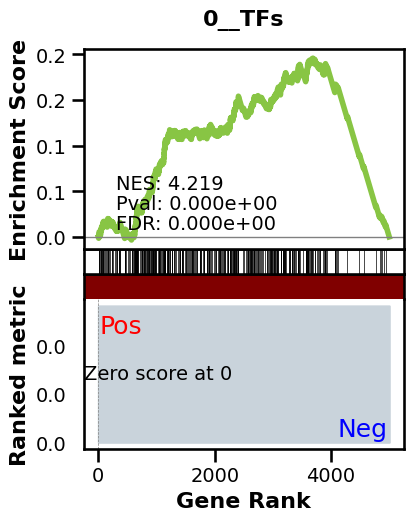

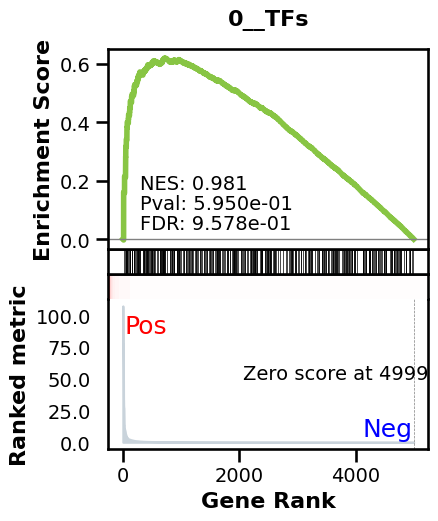

_________________________________________
TF specific enrichment


found some significant results for  63.63636363636363 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 94.63it/s]

 16%|█▌        | 20/128 [00:00<00:01, 82.24it/s]

 23%|██▎       | 29/128 [00:00<00:01, 80.04it/s]

 30%|██▉       | 38/128 [00:00<00:01, 77.15it/s]

 36%|███▌      | 46/128 [00:00<00:01, 77.15it/s]

 42%|████▏     | 54/128 [00:00<00:00, 77.21it/s]

 48%|████▊     | 62/128 [00:00<00:00, 77.29it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 77.36it/s]

 61%|██████    | 78/128 [00:00<00:00, 77.39it/s]

 67%|██████▋   | 86/128 [00:01<00:00, 77.38it/s]

 73%|███████▎  | 94/128 [00:01<00:00, 77.44it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 77.50it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 77.54it/s]

 92%|█████████▏| 118/128 [00:01<00:00, 77.57it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 77.57it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 78.00it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0013781424393257747
EPR: 0.49297628192893606


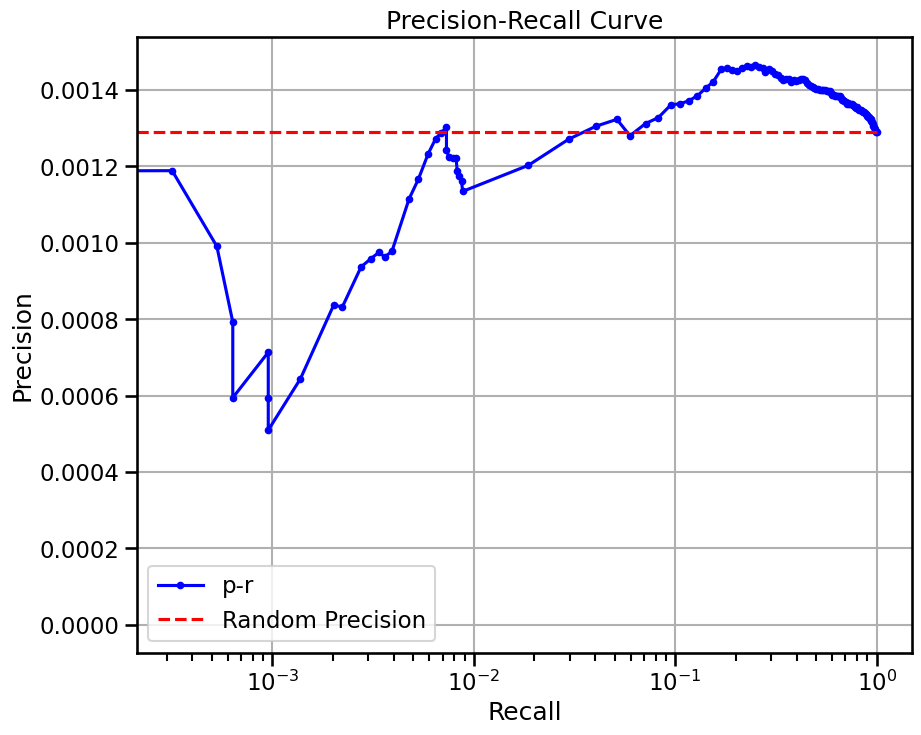

scprint_benchmark2
base enrichment


Top central genes: []


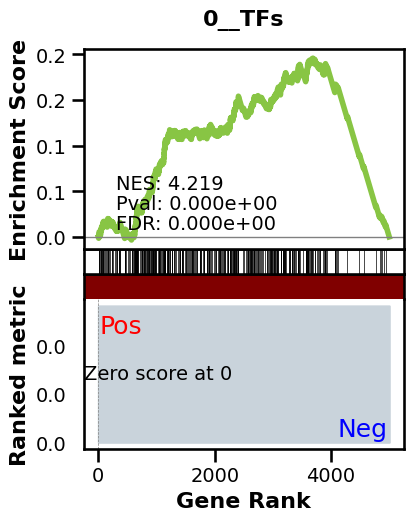

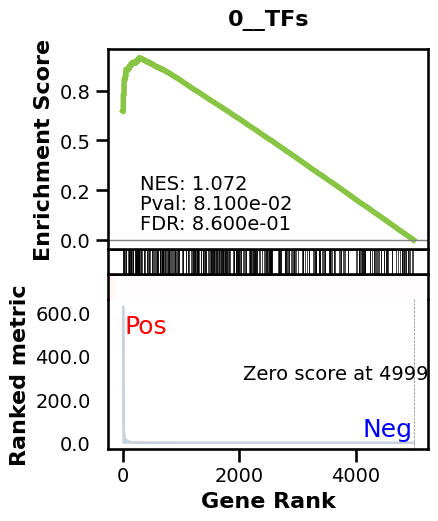

_________________________________________
TF specific enrichment


found some significant results for  18.181818181818183 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 96.05it/s]

 16%|█▌        | 20/128 [00:00<00:01, 95.83it/s]

 23%|██▎       | 30/128 [00:00<00:01, 95.93it/s]

 31%|███▏      | 40/128 [00:00<00:00, 95.97it/s]

 39%|███▉      | 50/128 [00:00<00:00, 96.02it/s]

 47%|████▋     | 60/128 [00:00<00:00, 95.99it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 96.00it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 95.99it/s]

 70%|███████   | 90/128 [00:00<00:00, 95.97it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 96.01it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 96.06it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 95.99it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 95.94it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0013715319254456392
EPR: 1.4000350101479082


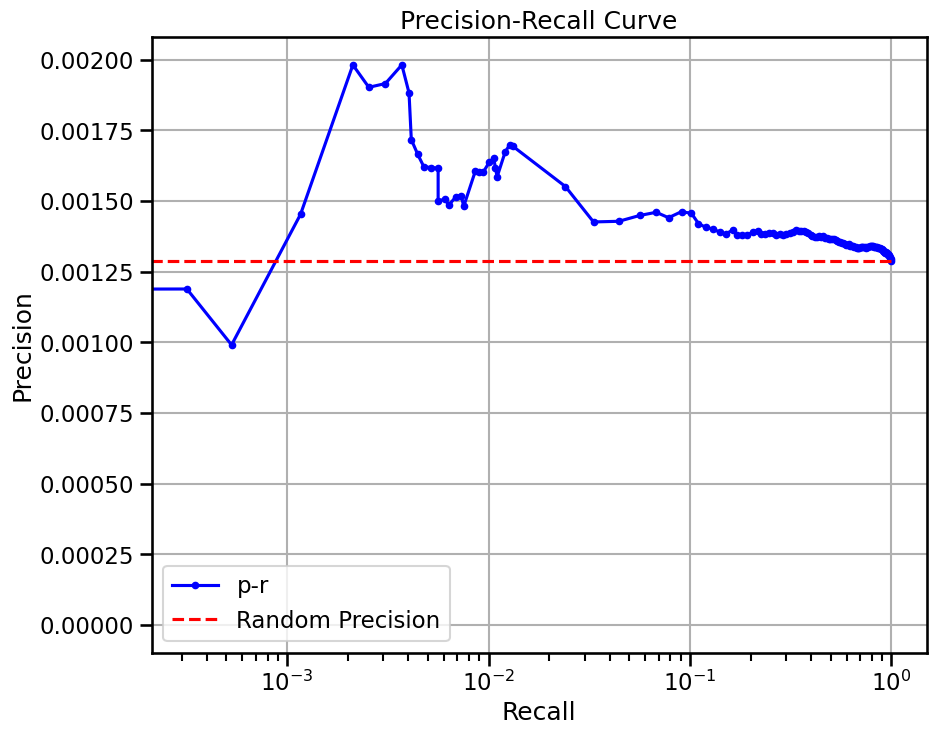

In [7]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    #grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
    #                     how="random expr",
    #                     preprocess="softmax",
    #                     head_agg='mean',
    #                     filtration="none",
    #                     forward_mode="none",
    #                     organisms=['NCBITaxon:9606','NCBITaxon:10090'],
    #                     num_genes=2200,
    #                     max_cells=MAXCELLS,
    #                     doplot=False,
    #                     batch_size=32,
    #                     )
    #grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    #grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    #metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    #del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='none',
                         filtration="none",
                         forward_mode="none",
                         num_genes=NUM_GENES,
                         max_cells=1024,
                         doplot=False,
                         batch_size=16,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        print("train classifier")
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    print("scprint_benchmark2")
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [8]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint_mean': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells'],
  'significant_enriched_TFtargets': 14.705882352941176,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.000872925772492089,
  'epr': 0.602959247805673},
 'kidney distal convoluted tubule epithelial cell_scprint_class': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells'],
  'significant_enriched_TFtargets': 2.9411764705882355,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.00079320715326562,
  'epr': 2.9052129647940905},
 'kidney loop of Henle thick ascending limb epithelial cell_scprint_mean': {'TF_enr': True,
  'significant_enriched_TFtargets': 23.076923076923077,
  'precision': 0.0008334948517653389,
  'recall': 1.0,
  'rand_precision': 0.0008337384212719915,
  'auprc': 0.0008

In [9]:
import pandas as pd

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,tools,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,mean,kidney distal convoluted tubule epithelial cell,0.602959,0.000873,0.000826,14.705882,True,False
1,class,kidney distal convoluted tubule epithelial cell,2.905213,0.000793,0.000826,2.941176,True,False
2,mean,kidney loop of Henle thick ascending limb epit...,1.474953,0.000844,0.000834,23.076923,True,False
3,class,kidney loop of Henle thick ascending limb epit...,0.613682,0.000743,0.000834,15.384615,True,False
4,mean,kidney collecting duct principal cell,1.224653,0.001404,0.001259,20.312500,True,False
5,class,kidney collecting duct principal cell,1.122309,0.001259,0.001259,7.812500,True,False
6,mean,mesangial cell,1.509181,0.001464,0.001044,50.000000,True,False
7,class,mesangial cell,2.559589,0.001125,0.001044,28.125000,True,False
8,mean,blood vessel smooth muscle cell,1.878604,0.001950,0.001573,45.454545,True,False
9,class,blood vessel smooth muscle cell,1.066141,0.001694,0.001573,10.909091,True,False
